<a href="https://colab.research.google.com/github/ohhanol/MachineLearning/blob/main/MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다층 신경망의 활성화 함수 선택
- (머신러닝 교과서, 세바스찬 라시카, p. 560) 13.5 다층 신경망의 활성화 함수
선택

## 1. 로지스틱 함수 요약

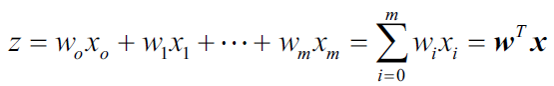

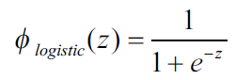

### **실습 코드** 1
- 데이터 *x*와 다음 코드과 같은 가중치 벡터 *w*로 구성된 모델을 가정
- 이 특성과 가중치 값을 사용하여 최종 입력(*z*)를 계산하고 이것으로 로지스틱 뉴런의 활성화 출력을 구하면 0.888을 얻음.
- 이를 샘플 *x*가 양성(+1) 클래스에 속할 확률이 88.8%라고 해석학 수 있음

In [ ]:
import numpy as np

# 입력 벡터 X와 가중치 벡터 w를 정의
X=np.array([1, 1.4, 2.5]) ## 첫 값은 1이어야 함(bias이므로)
w=np.array([0.4, 0.3, 0.5])

# 최종 입력(logit) 계산하는 함수
def net_input(X,w):
  return np.dot(X,w)

# 로지스틱 시그모이드 함수 정의
def logistic(z):
  return 1.0/(1.0+np.exp(-z))

# 활성함수 정의. 양성(+1) 클래스에 속할 확률을 계산한다
def logistic_activation(X, w):
  z=net_input(X,w)     # 최종 입력(logit)을 계산하여
  return logistic(z)   # 활성함수에 전달

# 활성함수로 양성 클래스에 속할 확률 출력
print('P(y=1|x) = %.3f' % logistic_activation(X,w))

P(y=1|x) = 0.888


### **실습 코드** 2
- 다중 클래스
- 로지스틱 활성화 유닛으로 출력층 구성
- 하지만, 다음 코드의 출력은 의미 있게 해석할 만한 확률 값을 만들지 못함

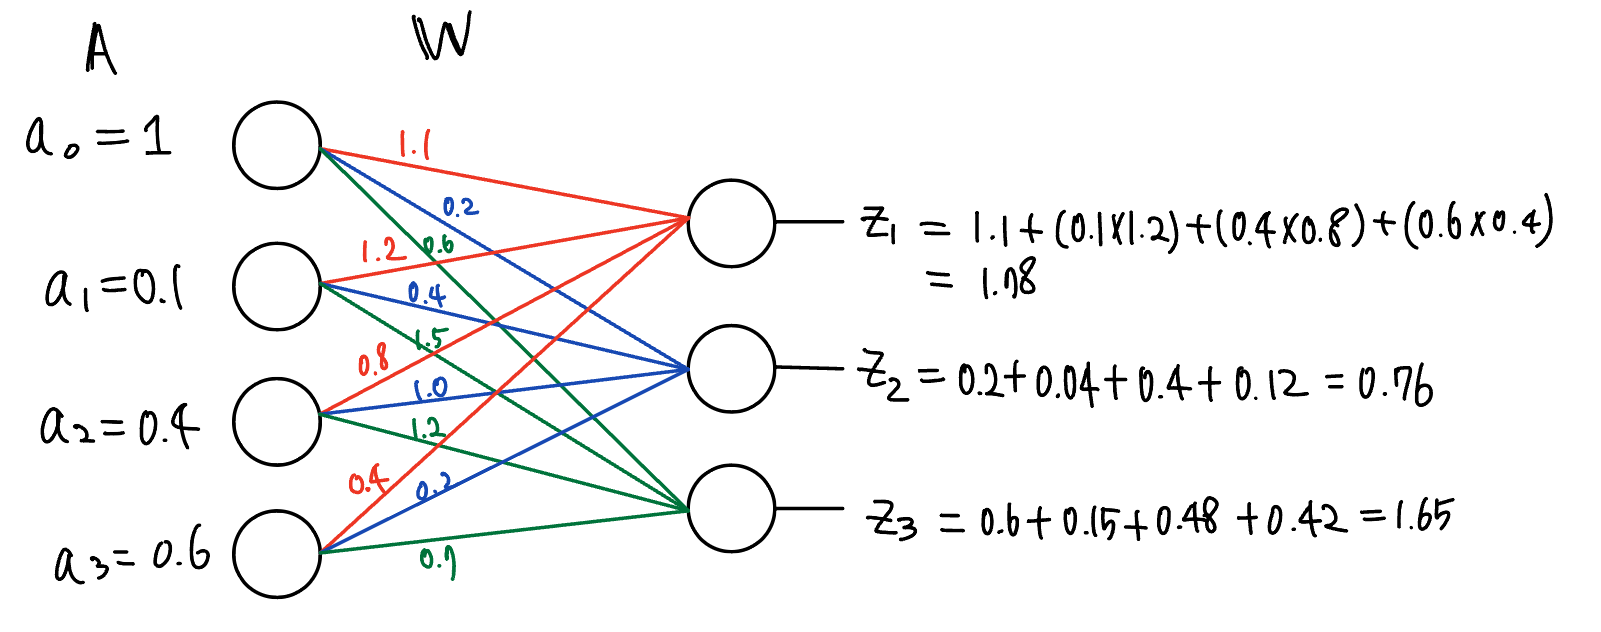

In [ ]:
# W 배열의 크기는 n_output_units, n_hidden_units+1
# 첫번째 열은 bias 유닛

# 가중치 행렬 W 정의
W=np.array([[1.1, 1.2, 0.8, 0.4],
            [0.2, 0.4, 1.0, 0.2],
            [0.6, 1.5, 1.2, 0.7]])

# 입력 데이터 A 행렬 정의
# A 배열의 크기는 n_hidden_units+1, n_samples
# 첫번째열은 bias이므로 1
A=np.array([[1, 0.1, 0.4, 0.6]])

# 최종 입력(logit)을 계산
Z=np.dot(W,A[0])

# 로지스틱 활성 함수를 사용해 유닛 출력 계산
y_probas=logistic(Z)
print('최종 입력: ', Z)

print('유닛 출력: ', y_probas)

최종 입력:  [1.78 0.76 1.65]
유닛 출력:  [0.85569687 0.68135373 0.83889105]


### **실습 코드** 3
- 클래스의 레이블을 예측하기 위해 가장 큰 값을 선택

In [ ]:
# One versus Rest 방법. 단순히 유닛 출력 중에서 가장 큰 값을 선택하여 예측한다.
y_class=np.argmax(Z, axis=0)    # 각 열(axis=0)에서 최댓값의 클래스를 선택
print('예측 클래스 레이블: %d'% y_class)

예측 클래스 레이블: 0



## 2. 소프트맥스 함수를 사용한 다중 클래스 확률 예측

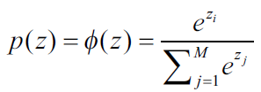

### **실습 코드** 4
- softmax 함수의 동작 확인

In [ ]:
# softmax 함수 정의
# 각 요소를 지수함수로 변환한 후 지수값들의 총합으로 나눠준다 → 확률이 됨
def softmax(z):
  return np.exp(z)/np.sum(np.exp(z))

# softmax 함수를 사용해 클래스에 속할 '확률'을 계산한다.
y_probas=softmax(Z)

# 계산된 확률을 출력
print('확률: ', y_probas)
# 확률의 총합이 1이 되는지 확인
print('합계: ', np.sum(y_probas))

확률:  [0.44668973 0.16107406 0.39223621]
합계:  1.0


## 3. Iris classification Task에 활성화 함수 적용 예제


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# 라이브러리 import 후 데이터셋 링크로 iris.csv 읽어오기
import os
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
s='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [ ]:
# Iris 데이터셋을 CSV 파일로 읽어오기. utf-8은 인코딩
df=pd.read_csv(s, header=None, encoding='utf-8')

# One-Hot 인코딩을 사용하여 다중 클래스 라벨을 변환
ohe=OneHotEncoder(sparse_output=False)
y=ohe.fit_transform(df.iloc[:][[4]])

# 각 라벨을 0, 1, 2(정수)로 매핑하기 위해 d 디렉토리 생성
d={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

# 0, 1, 2로 변환한 클래스 라벨을 y_ori에 저장
y_ori=df.iloc[:, 4].map(d)

# 꽃받침 길이(0번열)와 꽃잎 길이(1번열)를 특징값으로 추출
X=df.iloc[:,[0,2]].values

### 퍼셉트론 모델 구현

In [ ]:
import numpy as np


class Perceptron(object):
    """퍼셉트론 분류기 구현 """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        ''' 초기화 함수 구현 '''
        self.eta=eta  # 학습률(learning rate)
        self.n_iter=n_iter    # epoch 횟수 = 데이터 반복 횟수
        self.random_state=random_state  # 랜덤 초기화를 위한 시드값

    def fit(self, X, y):
        """훈련 데이터 학습 함수 구현 """
        # 평균=0, 표준편차 0.01의 정규 분포로 가중치 초기화
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=(y.shape[1], X.shape[1]+1))
        self.errors_=[]   # epoch 마다 쌓이는 오분류를 저장할 리스트

        for _ in range(self.n_iter):    # 주어진 epoch 횟수 동안 반복
          errors=0
          for xi,target in zip(X,y):
            # 가중치 업데이트
            update=self.eta*(target-self.predict(xi))
            self.w_[:,1:] += (np.transpose([update])*xi)
            self.w_[:, 0] += update
            errors+=int(sum(update !=0.0))   # 오분류를 누적
          self.errors_.append(errors)
        return self


    def net_input(self, X):
        """입력 계산 함수 구현"""
        # 가중치 w와 입력 데이터 X를 곱하고 bias를 더하여 최종 입력(logit)을 계산
        return np.dot(X,self.w_[:,1:].T)+self.w_[:,0]

    def predict(self, X, activation='Softmax_binary'):
        """예측 함수 구현"""
        # Softmax_binary이면 입력 벡터 X를 softmax 함수에 적용하여 확률 계산 후
        # 0.5를 기준으로 작으면 클래스 0, 크면 클래스 1
        if activation == 'Softmax_binary':
          return np.where(softmax(self.net_input(X))<0.5,0,1)
        # Softmax이면 입력벡터 X를 softmax 함수에 적용하여 다중 클래스 확률 예측
        elif activation=='Softmax':
          return softmax(self.net_input(X))
        # Logistic이면 입력벡터 X를 logistic 함수에 적용하여 확률을 예측
        elif activation == 'Logistic':
          return logistic(self.net_input(X))

    # 다중 클래스 분류 함수 정의
    # 입력 벡터 X를 softmax 함수에 적용하고 확률이 가장 높은 클래스로 분류
    def predict_argmax(self,X):
      return np.argmax(softmax(self.net_input(X)), axis=1)

### 퍼셉트론 모델 훈련하기

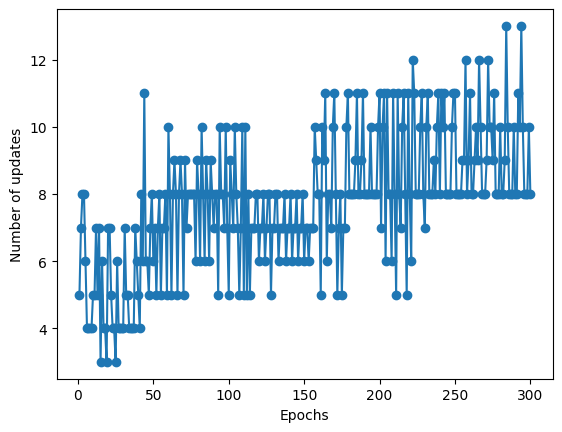

In [ ]:
# Perceptron 선언
# 학습률 0.03, epoch 300
ppn=Perceptron(eta=0.03, n_iter=300)

# 퍼셉트론 모델 훈련
ppn.fit(X,y)

# Epochs당 Number of updates그래프 출력
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')      # x축 레이블 이름
plt.ylabel('Number of updates')   # y축 레이블 이름

plt.show()


### 결정 경계 그래프 함수

In [ ]:
from matplotlib.colors import ListedColormap

# 결정 경계 그래프 함수 정의
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # 마커와 컬러맵을 설정합니다
    markers=('s', 'x', 'o', '^', 'v')
    colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max=X[:,0].min()-1, X[:,0].max()+1   # 꽃받침 길이 최소/최대
    x2_min, x2_max=X[:,1].min()-1, X[:,1].max()+1   # 꽃잎 길이 최소/최대
    xx1, xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
    # 결정경계 계산
    Z=classifier.predict_argmax(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)

    # 결정 경계 채우기
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y==cl, 0],
                  y=X[y==cl, 1],
                  alpha=0.8,
                  c=colors[idx],
                  marker=markers[idx],
                  label=cl,
                  edgecolor=None if idx==1 else 'black')


<function matplotlib.pyplot.show(close=None, block=None)>

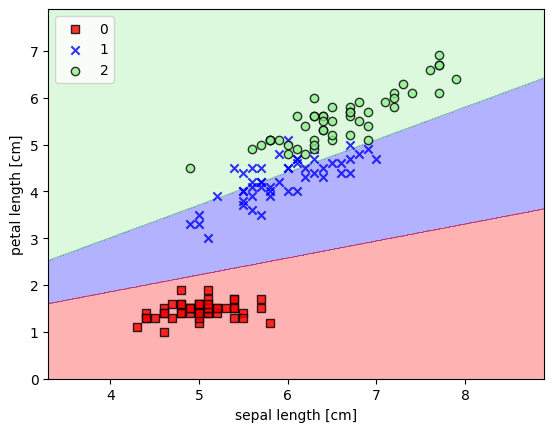

In [ ]:
# 결정 경계 그래프 출력
plot_decision_regions(X,y_ori,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show

In [ ]:
# Logistic Activation Function
# [1.4, 2.3]을 logistic 함수에 적용하여 확률을 예측

pred=ppn.predict([1.4, 2.3], activation='Logistic')
print(pred)
print('예측 클래스 레이블: ', np.argmax(pred))

[1. 1. 1.]
예측 클래스 레이블:  2


In [ ]:
# Softmax Activation Function
# [1.4, 2.3]을 softmax 함수에 적용하여 다중 클래스 확률 예측

pred=ppn.predict([1.4, 2.3], activation='Softmax')
print('확률: ', pred)
print('합계: ', np.sum(pred))   # 1이어야 함
print("예측 클래스 레이블: ", np.argmax(pred))

확률:  [2.42055670e-05 2.05470478e-04 9.99770324e-01]
합계:  1.0
예측 클래스 레이블:  2


# **추가 학습 : 이진 클래스 분류와 다중 클래스 분류의 구현상 차이 분석**

**1. 가중치 list 구조의 차이**

  **① 이진 분류의 가중치 list**

        def fit(self, X, y):
        ...
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        ...
        return self
  
  이진 분류는 클래스 라벨을 1, -1로 분류하는데, 하나의 가중치 벡터로 모든 클래스를 처리한다. 따라서 하나의 가중치 벡터가 필요하므로 퍼셉트론 구현 함수에서 초기 가중치를 설정할 때 가중치 벡터의 크기가 '1+X.shape[1]'이다.



**② 다중 클래스 분류의 가중치 list**
  
        def fit(self, X, y):
        ...
        
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=(y.shape[1], X.shape[1]+1))
        ...
        return self

다중 클래스 분류는 클래스마다 가중치 벡터가 필요하므로 클래스 개수에 따라 여러 개의 가중치 벡터가 필요하다. 따라서 퍼셉트론 구현 함수에서 초기 가중치를 설정할 때 가중치 list의 가 'y.shape[1], X.shape[1]+1' 이다.

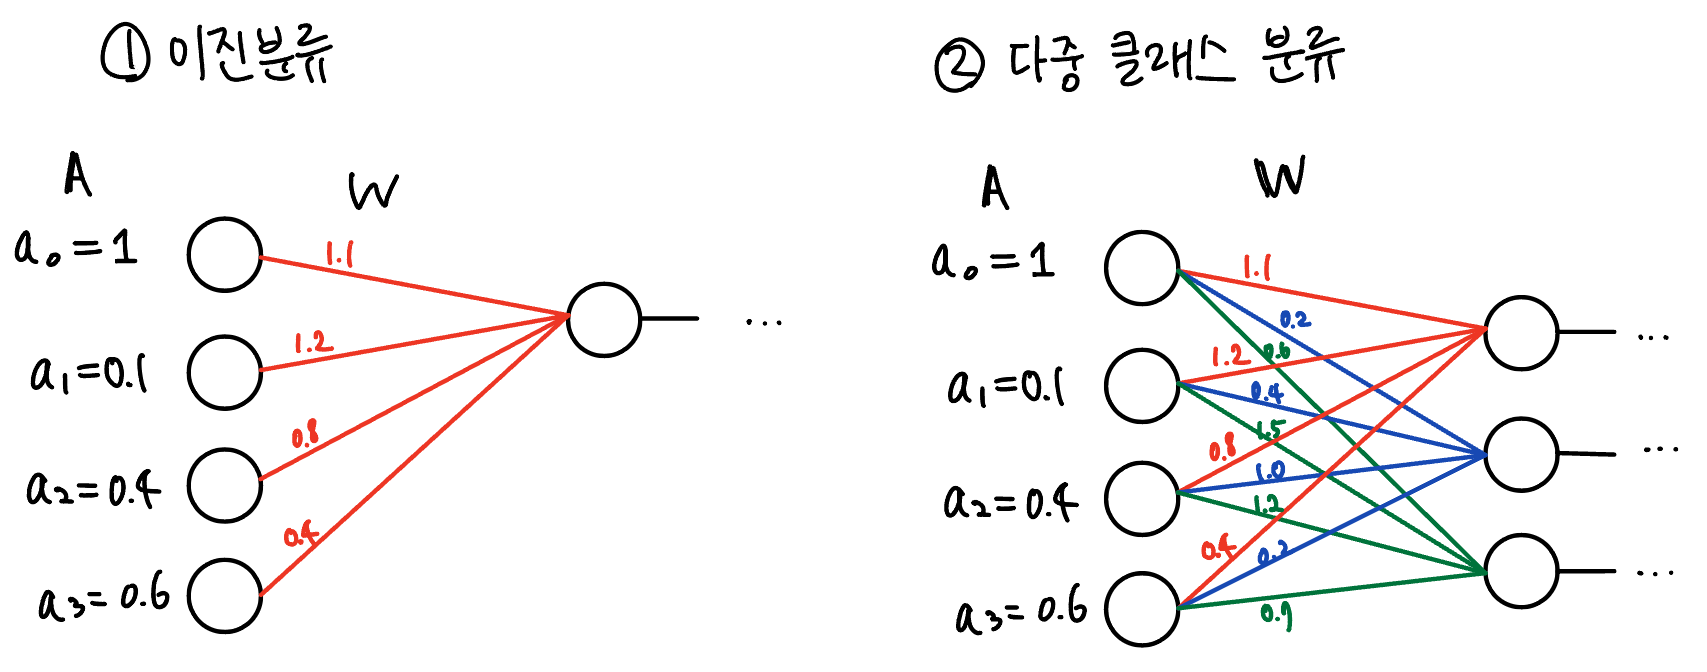

**2. parameter update 방법의 차이**

**① 이진 분류의 가중치 업데이트**

      for xi,target in zip(X,y):
            # 가중치 업데이트
            update=self.eta*(target-self.predict(xi))
            self.w_[1:] += update*xi
            self.w_[0]+=update
            errors+=int(update !=0.0)   # 오분류를 누적

이진 분류는 입력 벡터의 각각에 가중치를 직접 업데이트한다. 따라서 'self.w_[1:] += update*xi' 와 같이 가중치를 업데이트한다.

**② 다중 클래스 분류의 가중치 업데이트**

      for xi,target in zip(X,y):
            # 가중치 업데이트
            update=self.eta*(target-self.predict(xi))
            self.w_[:,1:] += (np.transpose([update])*xi)
            self.w_[:, 0] += update
            errors+=int(sum(update !=0.0))   # 오분류를 누적

다중 클래스 분류는 클래스 별로 가중치를 업데이트해야 한다. 따라서 전치행렬로 만들어주는 함수 np.transpose를 사용하여 'self.w_[:,1:] += (np.transpose([update])*xi)' 와 같은 방법으로 가중치를 업데이트한다.